1. Import Library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

2. Deskripsikan dataset dan tampilkan data data teratas

In [ ]:
social_data = pd.read_csv("social.csv")
social_data.drop("Purchased",axis=1,inplace=True)

In [ ]:
social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserID           400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
social_data.head()

,UserID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000


3. Tampilkan grafik elbow method dan pilih nilai K terbaik

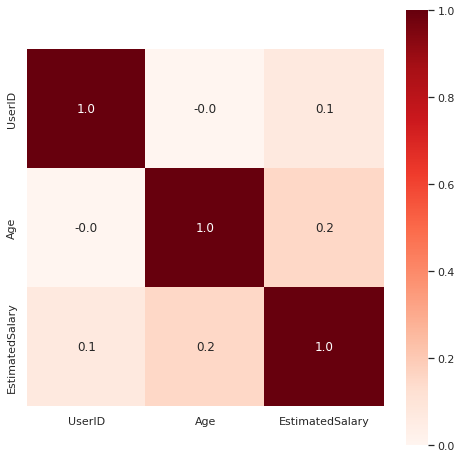

In [ ]:
# We can use a heatmap to check correlation between the variables.
corr = social_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

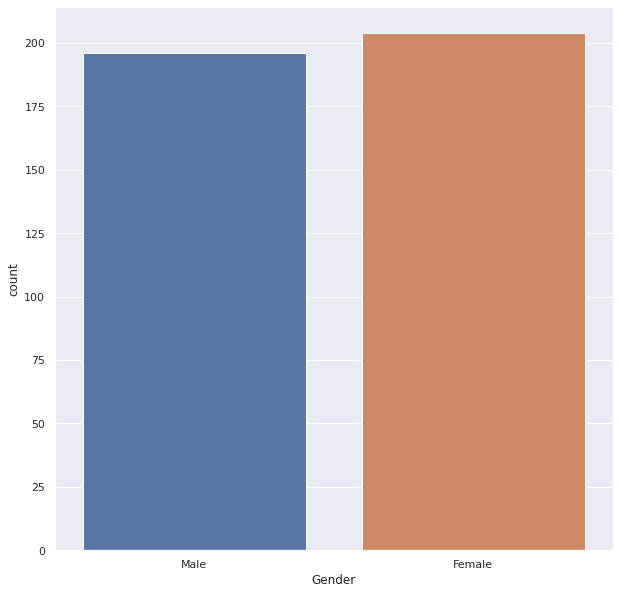

In [ ]:
# Which gender shops more?
plt.figure(figsize=(10,10))
sns.countplot(x="Gender", data=social_data)

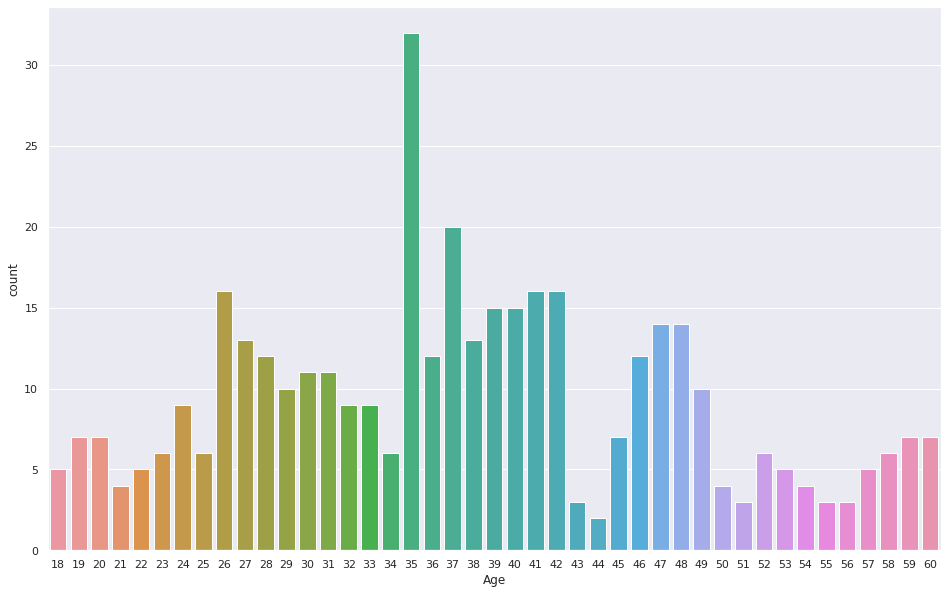

In [ ]:
# People of what ages shop more?
plt.figure(figsize=(16,10))
sns.countplot(x="Age", data=social_data)

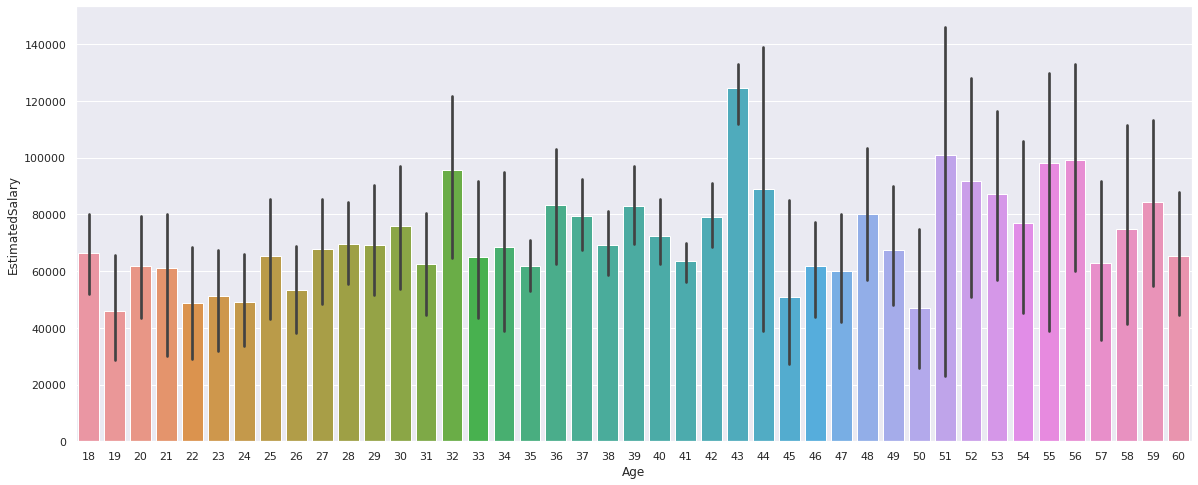

In [ ]:
# Is there really no relationship between Age and Estimated Salary?
plt.figure(figsize=(20,8))
sns.barplot(x='Age',y='EstimatedSalary',data=social_data)

In [ ]:
social_data

,UserID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [ ]:
# For our model, we can choose whatever variables we think are relevant or necessary, we needn't choose all.
# I'm going to choose age, annual income and spending score columns for my clustering model.
X = social_data.iloc[:,[2,3]].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [ ]:
wcss = []
for i in range(1,11): # It will find wcss value for different number of clusters (for 1 cluster, for 2...until 10 clusters) and put it in our list
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[463878521346.3898,
 165344597540.1395,
 59489963536.99382,
 33459749146.525555,
 19983401049.300735,
 14690913271.804783,
 10228688244.027874,
 8064686118.764723,
 6349868365.450577,
 5317745364.040573]

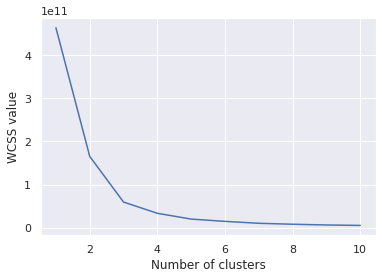

In [ ]:
# elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")
plt.show()

4. Train Model

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 0)

In [ ]:
# we need a label for each datapoint relative to their clusters (will be split into 5 clusters and each will be labelled 0-4)
y = kmeans.fit_predict(X)

In [ ]:
X[y==0,1]

array([ 57000,  76000,  58000,  84000,  65000,  80000,  86000,  82000,
        80000,  74000,  90000,  72000,  84000,  79000,  89000,  83000,
        58000,  79000,  87000,  66000,  83000,  58000,  82000,  63000,
        68000,  80000,  87000,  80000,  88000,  62000,  85000,  81000,
        81000,  83000,  73000,  88000,  59000,  86000,  72000,  89000,
        86000,  80000,  71000,  71000,  61000,  80000,  57000,  75000,
        59000,  59000,  75000,  72000,  75000,  61000,  65000,  84000,
        58000,  87000,  68000,  63000,  82000,  59000,  85000,  68000,
        59000,  89000,  89000,  96000,  61000,  74000,  76000,  59000,
        75000, 100000,  90000,  69000,  86000,  71000,  88000,  72000,
        71000,  60000,  66000,  82000,  72000,  84000,  70000,  89000,
        79000,  80000,  74000,  71000,  96000,  58000,  65000,  78000,
        96000,  80000,  91000,  60000,  72000,  80000,  86000,  79000,
        57000,  80000,  82000,  59000,  88000,  72000,  97000,  90000,
      

6. Visualisasikan Cluster

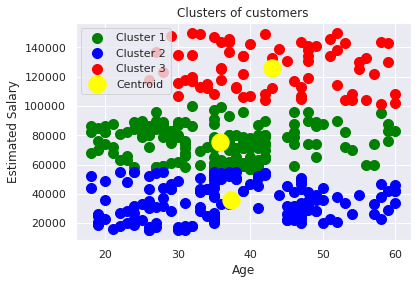

In [ ]:
#visulaizing the clusters  
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'green', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y== 2, 0], X[y == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show() 